In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

def fetch_data(ticker, start_date, end_date):
    """
    Fetches historical market data from Yahoo Finance.

    Parameters:
    ticker (str): The ticker symbol of the asset.
    start_date (str): The start date for the historical data in the format 'YYYY-MM-DD'.
    end_date (str): The end date for the historical data in the format 'YYYY-MM-DD'.

    Returns:
    pandas.DataFrame: A DataFrame with historical data for the specified asset.
    """
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

gold_ticker = 'GC=F'
crude_oil_ticker = 'CL=F'
ng_ticker = 'NG=F'

start_date = '2019-04-15'
end_date = '2024-04-15'


gold_data = fetch_data(gold_ticker, start_date, end_date).reset_index()
crude_oil_data = fetch_data(crude_oil_ticker, start_date, end_date).reset_index()
natural_gas_data = fetch_data(ng_ticker, start_date, end_date).reset_index()


print("\nGold Futures Data:")
print(gold_data.head())

print("\nCrude Oil Futures Data:")
print(crude_oil_data.head())

print("\nNatural Gas Futures Data:")
print(natural_gas_data.head())


C:\Users\12799\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\12799\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Gold Futures Data:
        Date         Open         High          Low        Close    Adj Close  \
0 2019-04-15  1284.800049  1287.300049  1282.300049  1286.800049  1286.800049   
1 2019-04-16  1285.199951  1285.199951  1272.199951  1272.599976  1272.599976   
2 2019-04-17  1273.500000  1273.500000  1271.599976  1272.199951  1272.199951   
3 2019-04-18  1270.800049  1273.599976  1270.099976  1271.900024  1271.900024   
4 2019-04-22  1273.500000  1273.500000  1273.500000  1273.500000  1273.500000   

   Volume  
0     523  
1     643  
2     308  
3      27  
4     147  

Crude Oil Futures Data:
        Date       Open       High        Low      Close  Adj Close  Volume
0 2019-04-15  63.759998  63.840000  63.029999  63.400002  63.400002  555858
1 2019-04-16  63.570000  64.370003  62.990002  64.050003  64.050003  547469
2 2019-04-17  64.320000  64.610001  63.660000  63.759998  63.759998  235376
3 2019-04-18  63.750000  64.160004  63.459999  64.000000  64.000000  148238
4 2019-04-22  64

# CONSTRUCT CTA STRATEGY

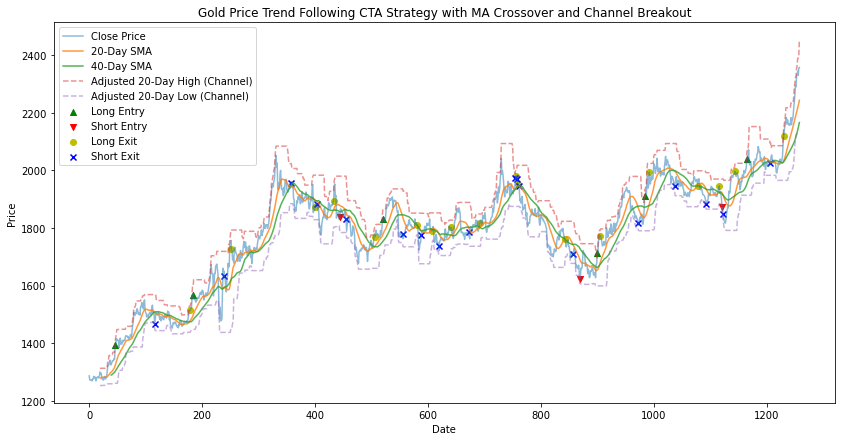

,Date,Open,Close,20d_SMA,40d_SMA,Adjusted_20d_High,Adjusted_20d_Low,Position,Stop_Loss_Level
1254,2024-04-08,2325.600098,2331.699951,2207.524988,2131.577493,2365.218049,2124.737952,0,117.919824
1255,2024-04-09,2337.800049,2343.500000,2215.574988,2139.582492,2388.346951,2124.737952,0,123.399805
1256,2024-04-10,2346.600098,2329.600098,2224.034998,2147.367496,2388.346951,2124.737952,0,132.719922
1257,2024-04-11,2341.500000,2354.800049,2233.005005,2156.414996,2400.063049,2124.737952,0,141.359961
1258,2024-04-12,2377.300049,2356.199951,2242.665002,2165.562494,2453.290000,2124.737952,0,160.439941


In [2]:
!pip install matplotlib
import matplotlib.pyplot as plt

gold_data['20d_SMA'] = gold_data['Close'].rolling(window=20).mean()
gold_data['50d_SMA'] = gold_data['Close'].rolling(window=50).mean()


gold_data['20d_High'] = gold_data['High'].rolling(window=20).max()
gold_data['20d_Low'] = gold_data['Low'].rolling(window=20).min()


gold_data['Buy_Signal'] = np.where(gold_data['Close'] > gold_data['20d_High'].shift(1), 1, 0)
gold_data['Sell_Signal'] = np.where(gold_data['Close'] < gold_data['20d_Low'].shift(1), -1, 0)


gold_data['Signal'] = gold_data['Buy_Signal'] + gold_data['Sell_Signal']

gold_data['40d_SMA'] = gold_data['Close'].rolling(window=40).mean()


gold_data['High_Low_Range'] = gold_data['High'] - gold_data['Low']
gold_data['10d_ADR'] = gold_data['High_Low_Range'].rolling(window=10).mean()


channel_breakout_percentage = 0.01


gold_data['Adjusted_20d_High'] = gold_data['20d_High'] * (1 + channel_breakout_percentage)
gold_data['Adjusted_20d_Low'] = gold_data['20d_Low'] * (1 - channel_breakout_percentage)


gold_data['Long_Entry'] = np.where(gold_data['Open'] > gold_data['Adjusted_20d_High'].shift(1), 1, 0)
gold_data['Short_Entry'] = np.where(gold_data['Open'] < gold_data['Adjusted_20d_Low'].shift(1), -1, 0)


gold_data['Long_Exit'] = np.where((gold_data['20d_SMA'].shift(1) < gold_data['40d_SMA'].shift(1)) &
                                  (gold_data['20d_SMA'] > gold_data['40d_SMA']), -1, 0)

gold_data['Short_Exit'] = np.where((gold_data['20d_SMA'].shift(1) > gold_data['40d_SMA'].shift(1)) &
                                   (gold_data['20d_SMA'] < gold_data['40d_SMA']), 1, 0)


gold_data['Position'] = gold_data['Long_Entry'] + gold_data['Short_Entry'] + gold_data['Long_Exit'] + gold_data['Short_Exit']


gold_data['Stop_Loss_Level'] = 4 * gold_data['10d_ADR']


plt.figure(figsize=(14,7))
plt.plot(gold_data['Close'], label='Close Price', alpha=0.5)
plt.plot(gold_data['20d_SMA'], label='20-Day SMA', alpha=0.8)
plt.plot(gold_data['40d_SMA'], label='40-Day SMA', alpha=0.8)
plt.plot(gold_data['Adjusted_20d_High'], label='Adjusted 20-Day High (Channel)', alpha=0.5, linestyle='--')
plt.plot(gold_data['Adjusted_20d_Low'], label='Adjusted 20-Day Low (Channel)', alpha=0.5, linestyle='--')
plt.scatter(gold_data.index[gold_data['Long_Entry'] == 1], gold_data['Close'][gold_data['Long_Entry'] == 1], label='Long Entry', marker='^', color='g')
plt.scatter(gold_data.index[gold_data['Short_Entry'] == -1], gold_data['Close'][gold_data['Short_Entry'] == -1], label='Short Entry', marker='v', color='r')
plt.scatter(gold_data.index[gold_data['Long_Exit'] == -1], gold_data['Close'][gold_data['Long_Exit'] == -1], label='Long Exit', marker='o', color='y')
plt.scatter(gold_data.index[gold_data['Short_Exit'] == 1], gold_data['Close'][gold_data['Short_Exit'] == 1], label='Short Exit', marker='x', color='b')
plt.title('Gold Price Trend Following CTA Strategy with MA Crossover and Channel Breakout')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()


gold_data[['Date', 'Open', 'Close', '20d_SMA', '40d_SMA', 'Adjusted_20d_High', 'Adjusted_20d_Low', 'Position', 'Stop_Loss_Level']].tail()

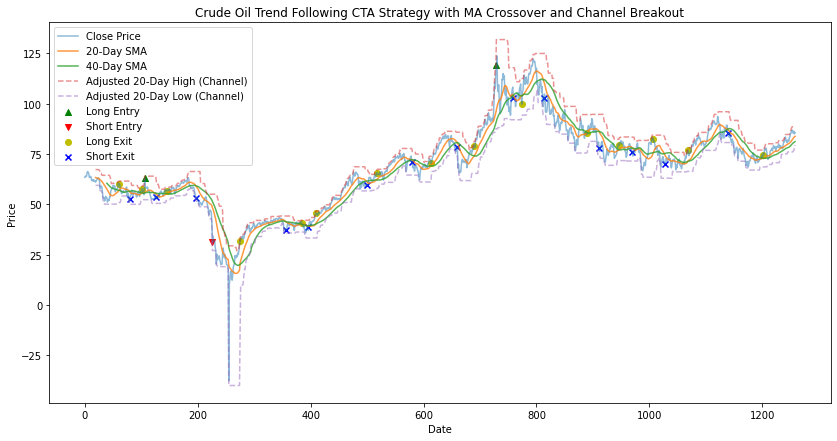

,Date,Open,Close,20d_SMA,40d_SMA,Adjusted_20d_High,Adjusted_20d_Low,Position,Stop_Loss_Level
1254,2024-04-08,2325.600098,2331.699951,2207.524988,2131.577493,2365.218049,2124.737952,0,117.919824
1255,2024-04-09,2337.800049,2343.500000,2215.574988,2139.582492,2388.346951,2124.737952,0,123.399805
1256,2024-04-10,2346.600098,2329.600098,2224.034998,2147.367496,2388.346951,2124.737952,0,132.719922
1257,2024-04-11,2341.500000,2354.800049,2233.005005,2156.414996,2400.063049,2124.737952,0,141.359961
1258,2024-04-12,2377.300049,2356.199951,2242.665002,2165.562494,2453.290000,2124.737952,0,160.439941


In [3]:
crude_oil_data['20d_SMA'] = crude_oil_data['Close'].rolling(window=20).mean()
crude_oil_data['50d_SMA'] = crude_oil_data['Close'].rolling(window=50).mean()


crude_oil_data['20d_High'] = crude_oil_data['High'].rolling(window=20).max()
crude_oil_data['20d_Low'] = crude_oil_data['Low'].rolling(window=20).min()


crude_oil_data['Buy_Signal'] = np.where(crude_oil_data['Close'] > crude_oil_data['20d_High'].shift(1), 1, 0)
crude_oil_data['Sell_Signal'] = np.where(crude_oil_data['Close'] < crude_oil_data['20d_Low'].shift(1), -1, 0)


crude_oil_data['Signal'] = crude_oil_data['Buy_Signal'] + crude_oil_data['Sell_Signal']

crude_oil_data['40d_SMA'] = crude_oil_data['Close'].rolling(window=40).mean()


crude_oil_data['High_Low_Range'] = crude_oil_data['High'] - crude_oil_data['Low']
crude_oil_data['10d_ADR'] = crude_oil_data['High_Low_Range'].rolling(window=10).mean()


channel_breakout_percentage = 0.01


crude_oil_data['Adjusted_20d_High'] = crude_oil_data['20d_High'] * (1 + channel_breakout_percentage)
crude_oil_data['Adjusted_20d_Low'] = crude_oil_data['20d_Low'] * (1 - channel_breakout_percentage)


crude_oil_data['Long_Entry'] = np.where(crude_oil_data['Open'] > crude_oil_data['Adjusted_20d_High'].shift(1), 1, 0)
crude_oil_data['Short_Entry'] = np.where(crude_oil_data['Open'] < crude_oil_data['Adjusted_20d_Low'].shift(1), -1, 0)


crude_oil_data['Long_Exit'] = np.where((crude_oil_data['20d_SMA'].shift(1) < crude_oil_data['40d_SMA'].shift(1)) &
                                  (crude_oil_data['20d_SMA'] > crude_oil_data['40d_SMA']), -1, 0)

crude_oil_data['Short_Exit'] = np.where((crude_oil_data['20d_SMA'].shift(1) > crude_oil_data['40d_SMA'].shift(1)) &
                                   (crude_oil_data['20d_SMA'] < crude_oil_data['40d_SMA']), 1, 0)


crude_oil_data['Position'] = crude_oil_data['Long_Entry'] + crude_oil_data['Short_Entry'] + crude_oil_data['Long_Exit'] + crude_oil_data['Short_Exit']

crude_oil_data['Stop_Loss_Level'] = 4 * crude_oil_data['10d_ADR']


plt.figure(figsize=(14,7))
plt.plot(crude_oil_data['Close'], label='Close Price', alpha=0.5)
plt.plot(crude_oil_data['20d_SMA'], label='20-Day SMA', alpha=0.8)
plt.plot(crude_oil_data['40d_SMA'], label='40-Day SMA', alpha=0.8)
plt.plot(crude_oil_data['Adjusted_20d_High'], label='Adjusted 20-Day High (Channel)', alpha=0.5, linestyle='--')
plt.plot(crude_oil_data['Adjusted_20d_Low'], label='Adjusted 20-Day Low (Channel)', alpha=0.5, linestyle='--')
plt.scatter(crude_oil_data.index[crude_oil_data['Long_Entry'] == 1], crude_oil_data['Close'][crude_oil_data['Long_Entry'] == 1], label='Long Entry', marker='^', color='g')
plt.scatter(crude_oil_data.index[crude_oil_data['Short_Entry'] == -1], crude_oil_data['Close'][crude_oil_data['Short_Entry'] == -1], label='Short Entry', marker='v', color='r')
plt.scatter(crude_oil_data.index[crude_oil_data['Long_Exit'] == -1], crude_oil_data['Close'][crude_oil_data['Long_Exit'] == -1], label='Long Exit', marker='o', color='y')
plt.scatter(crude_oil_data.index[crude_oil_data['Short_Exit'] == 1], crude_oil_data['Close'][crude_oil_data['Short_Exit'] == 1], label='Short Exit', marker='x', color='b')
plt.title('Crude Oil Trend Following CTA Strategy with MA Crossover and Channel Breakout')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()


gold_data[['Date', 'Open', 'Close', '20d_SMA', '40d_SMA', 'Adjusted_20d_High', 'Adjusted_20d_Low', 'Position', 'Stop_Loss_Level']].tail()

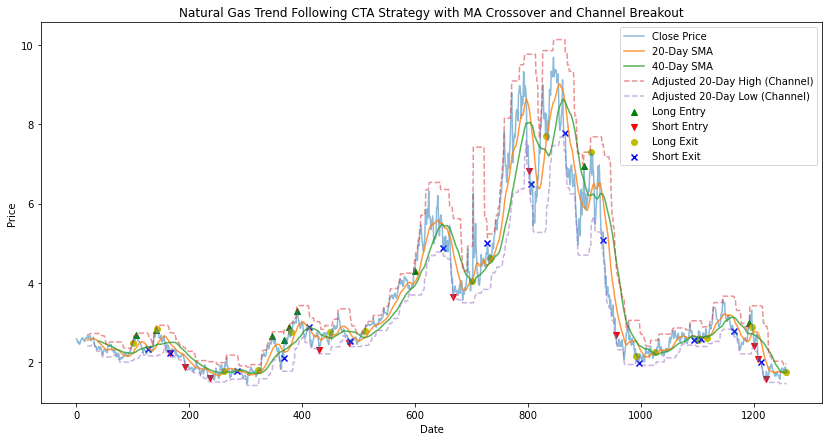

           Date   Open  Close  20d_SMA   40d_SMA  Adjusted_20d_High  \
1254 2024-04-08  1.770  1.844  1.73145  1.742375            1.92506   
1255 2024-04-09  1.847  1.872  1.73710  1.743000            1.94324   
1256 2024-04-10  1.888  1.885  1.74565  1.745925            1.96243   
1257 2024-04-11  1.874  1.764  1.75095  1.747800            1.96243   
1258 2024-04-12  1.767  1.770  1.75240  1.751825            1.96243   

      Adjusted_20d_Low  Position  Stop_Loss_Level  
1254           1.46619         0           0.4052  
1255           1.46619         0           0.4052  
1256           1.46619         0           0.3692  
1257           1.46619        -1           0.3904  
1258           1.46619         0           0.3720  


In [4]:
natural_gas_data['20d_SMA'] = natural_gas_data['Close'].rolling(window=20).mean()
natural_gas_data['50d_SMA'] = natural_gas_data['Close'].rolling(window=50).mean()


natural_gas_data['20d_High'] = natural_gas_data['High'].rolling(window=20).max()
natural_gas_data['20d_Low'] = natural_gas_data['Low'].rolling(window=20).min()


natural_gas_data['Buy_Signal'] = np.where(natural_gas_data['Close'] > natural_gas_data['20d_High'].shift(1), 1, 0)
natural_gas_data['Sell_Signal'] = np.where(natural_gas_data['Close'] < natural_gas_data['20d_Low'].shift(1), -1, 0)


natural_gas_data['Signal'] = natural_gas_data['Buy_Signal'] + natural_gas_data['Sell_Signal']


natural_gas_data['40d_SMA'] = natural_gas_data['Close'].rolling(window=40).mean()


natural_gas_data['High_Low_Range'] = natural_gas_data['High'] - natural_gas_data['Low']
natural_gas_data['10d_ADR'] = natural_gas_data['High_Low_Range'].rolling(window=10).mean()


channel_breakout_percentage = 0.01


natural_gas_data['Adjusted_20d_High'] = natural_gas_data['20d_High'] * (1 + channel_breakout_percentage)
natural_gas_data['Adjusted_20d_Low'] = natural_gas_data['20d_Low'] * (1 - channel_breakout_percentage)


natural_gas_data['Long_Entry'] = np.where(natural_gas_data['Open'] > natural_gas_data['Adjusted_20d_High'].shift(1), 1, 0)
natural_gas_data['Short_Entry'] = np.where(natural_gas_data['Open'] < natural_gas_data['Adjusted_20d_Low'].shift(1), -1, 0)

natural_gas_data['Long_Exit'] = np.where((natural_gas_data['20d_SMA'].shift(1) < natural_gas_data['40d_SMA'].shift(1)) &
                                  (natural_gas_data['20d_SMA'] > natural_gas_data['40d_SMA']), -1, 0)
natural_gas_data['Short_Exit'] = np.where((natural_gas_data['20d_SMA'].shift(1) > natural_gas_data['40d_SMA'].shift(1)) &
                                   (natural_gas_data['20d_SMA'] < natural_gas_data['40d_SMA']), 1, 0)


natural_gas_data['Position'] = natural_gas_data['Long_Entry'] + natural_gas_data['Short_Entry'] + natural_gas_data['Long_Exit'] + natural_gas_data['Short_Exit']


natural_gas_data['Stop_Loss_Level'] = 4 * natural_gas_data['10d_ADR']
natural_gas_data['20d_SMA'] = natural_gas_data['Close'].rolling(window=20).mean()
natural_gas_data['50d_SMA'] = natural_gas_data['Close'].rolling(window=50).mean()


natural_gas_data['20d_High'] = natural_gas_data['High'].rolling(window=20).max()
natural_gas_data['20d_Low'] = natural_gas_data['Low'].rolling(window=20).min()


natural_gas_data['Buy_Signal'] = np.where(natural_gas_data['Close'] > natural_gas_data['20d_High'].shift(1), 1, 0)
natural_gas_data['Sell_Signal'] = np.where(natural_gas_data['Close'] < natural_gas_data['20d_Low'].shift(1), -1, 0)


natural_gas_data['Signal'] = natural_gas_data['Buy_Signal'] + natural_gas_data['Sell_Signal']


natural_gas_data['40d_SMA'] = natural_gas_data['Close'].rolling(window=40).mean()


natural_gas_data['High_Low_Range'] = natural_gas_data['High'] - natural_gas_data['Low']
natural_gas_data['10d_ADR'] = natural_gas_data['High_Low_Range'].rolling(window=10).mean()


channel_breakout_percentage = 0.01


natural_gas_data['Adjusted_20d_High'] = natural_gas_data['20d_High'] * (1 + channel_breakout_percentage)
natural_gas_data['Adjusted_20d_Low'] = natural_gas_data['20d_Low'] * (1 - channel_breakout_percentage)


natural_gas_data['Long_Entry'] = np.where(natural_gas_data['Open'] > natural_gas_data['Adjusted_20d_High'].shift(1), 1, 0)
natural_gas_data['Short_Entry'] = np.where(natural_gas_data['Open'] < natural_gas_data['Adjusted_20d_Low'].shift(1), -1, 0)


natural_gas_data['Long_Exit'] = np.where((natural_gas_data['20d_SMA'].shift(1) < natural_gas_data['40d_SMA'].shift(1)) &
                                         (natural_gas_data['20d_SMA'] > natural_gas_data['40d_SMA']), -1, 0)
natural_gas_data['Short_Exit'] = np.where((natural_gas_data['20d_SMA'].shift(1) > natural_gas_data['40d_SMA'].shift(1)) &
                                          (natural_gas_data['20d_SMA'] < natural_gas_data['40d_SMA']), 1, 0)


natural_gas_data['Position'] = natural_gas_data['Long_Entry'] + natural_gas_data['Short_Entry'] + natural_gas_data['Long_Exit'] + natural_gas_data['Short_Exit']


natural_gas_data['Stop_Loss_Level'] = 4 * natural_gas_data['10d_ADR']


plt.figure(figsize=(14,7))
plt.plot(natural_gas_data['Close'], label='Close Price', alpha=0.5)
plt.plot(natural_gas_data['20d_SMA'], label='20-Day SMA', alpha=0.8)
plt.plot(natural_gas_data['40d_SMA'], label='40-Day SMA', alpha=0.8)
plt.plot(natural_gas_data['Adjusted_20d_High'], label='Adjusted 20-Day High (Channel)', alpha=0.5, linestyle='--')
plt.plot(natural_gas_data['Adjusted_20d_Low'], label='Adjusted 20-Day Low (Channel)', alpha=0.5, linestyle='--')
plt.scatter(natural_gas_data.index[natural_gas_data['Long_Entry'] == 1], natural_gas_data['Close'][natural_gas_data['Long_Entry'] == 1], label='Long Entry', marker='^', color='g')
plt.scatter(natural_gas_data.index[natural_gas_data['Short_Entry'] == -1], natural_gas_data['Close'][natural_gas_data['Short_Entry'] == -1], label='Short Entry', marker='v', color='r')
plt.scatter(natural_gas_data.index[natural_gas_data['Long_Exit'] == -1], natural_gas_data['Close'][natural_gas_data['Long_Exit'] == -1], label='Long Exit', marker='o', color='y')
plt.scatter(natural_gas_data.index[natural_gas_data['Short_Exit'] == 1], natural_gas_data['Close'][natural_gas_data['Short_Exit'] == 1], label='Short Exit', marker='x', color='b')
plt.title('Natural Gas Trend Following CTA Strategy with MA Crossover and Channel Breakout')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()


print(natural_gas_data[['Date', 'Open', 'Close', '20d_SMA', '40d_SMA', 'Adjusted_20d_High', 'Adjusted_20d_Low', 'Position', 'Stop_Loss_Level']].tail())

[*********************100%%**********************]  3 of 3 completed

Optimal Weights: [0.         0.94116029 0.05883971]


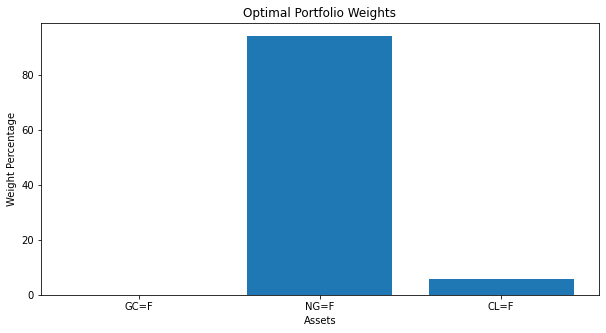

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def fetch_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Close']
    return data

def portfolio_annual_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    p_var, p_ret = portfolio_annual_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def optimize_portfolio(tickers, start_date, end_date):
    data = fetch_data(tickers, start_date, end_date)
    mean_returns = data.pct_change().mean()
    cov_matrix = data.pct_change().cov()

    num_assets = len(tickers)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = minimize(negative_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)

    return result

def display_optimal_portfolio(result, tickers):
    print("Optimal Weights:", result.x)
    plt.figure(figsize=(10, 5))
    plt.bar(tickers, result.x * 100)
    plt.xlabel('Assets')
    plt.ylabel('Weight Percentage')
    plt.title('Optimal Portfolio Weights')
    plt.show()

tickers = ['GC=F', 'NG=F', 'CL=F']
start_date = '2019-04-15'
end_date = '2024-04-15'

result = optimize_portfolio(tickers, start_date, end_date)
display_optimal_portfolio(result, tickers)

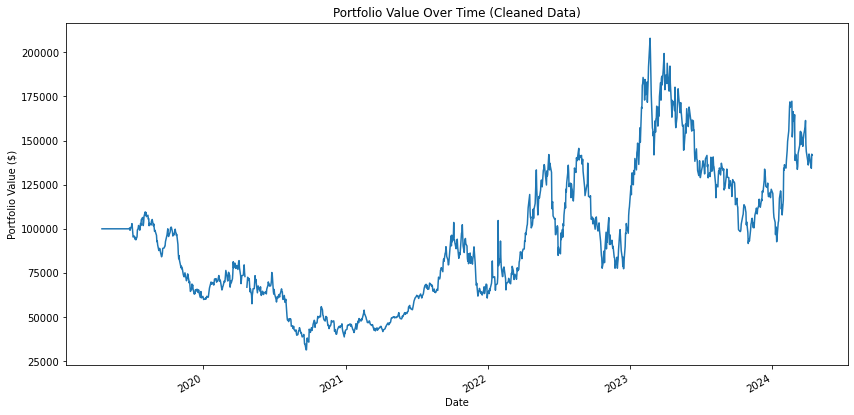

Cumulative Return: 41872.06
Annualized Volatility: 67.42%
Sharpe Ratio: 0.44


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def process_data(file_path):
    df = pd.read_csv(file_path)


    if 'Date' not in df.columns:
        raise KeyError("The 'Date' column is missing from the data.")

    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)


    df['SMA50'] = df['Adj Close'].rolling(window=50).mean()
    df['EMA200'] = df['Adj Close'].ewm(span=200, adjust=False).mean()


    df['Signal'] = np.where(df['SMA50'] > df['EMA200'], 1, np.where(df['SMA50'] < df['EMA200'], -1, 0))


    df['Daily Return'] = df['Adj Close'].pct_change()
    df['Strategy Return'] = df['Daily Return'] * df['Signal'].shift(1)

    return df


gold_data_path = 'gold_data.csv'
natural_gas_data_path = 'natural_gas_data.csv'
crude_oil_data_path = 'crude_oil_data.csv'


gold_data = process_data(gold_data_path)
natural_gas_data = process_data(natural_gas_data_path)
crude_oil_data = process_data(crude_oil_data_path)


crude_oil_data_cleaned = crude_oil_data[(crude_oil_data['Adj Close'] > 0) & (crude_oil_data['Adj Close'].pct_change().abs() <= 1)]

weight_gold = 0.0
weight_natural_gas = 0.94116029
weight_crude_oil = 0.05883971


portfolio_returns_cleaned = (
    gold_data['Strategy Return'].fillna(0) * weight_gold +
    natural_gas_data['Strategy Return'].fillna(0) * weight_natural_gas +
    crude_oil_data_cleaned['Strategy Return'].fillna(0) * weight_crude_oil
)


portfolio_value_cleaned = (1 + portfolio_returns_cleaned).cumprod() * 100000
cumulative_return_cleaned = portfolio_value_cleaned.iloc[-1] - 100000
daily_returns_cleaned = portfolio_returns_cleaned.fillna(0)
volatility_cleaned = daily_returns_cleaned.std() * np.sqrt(252)
sharpe_ratio_cleaned = daily_returns_cleaned.mean() / daily_returns_cleaned.std() * np.sqrt(252)

portfolio_value_cleaned.plot(title='Portfolio Value Over Time (Cleaned Data)', figsize=(14, 7))
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.show()


print(f"Cumulative Return: {cumulative_return_cleaned:.2f}")
print(f"Annualized Volatility: {volatility_cleaned:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_cleaned:.2f}")

# BACKTESTING 

In [7]:
# Calculate daily returns
gold_data['Daily Returns'] = gold_data['Adj Close'].pct_change()
natural_gas_data['Daily Returns'] = natural_gas_data['Adj Close'].pct_change()
crude_oil_data['Daily Returns'] = crude_oil_data['Adj Close'].pct_change()

#  Sharpe and Sortino Ratios
def calculate_sharpe_sortino(returns, risk_free_rate=0):
    mean_return = returns.mean()
    std_dev = returns.std()
    sharpe_ratio = (mean_return - risk_free_rate) / std_dev
    negative_returns = returns[returns < 0]
    downside_std = negative_returns.std()
    sortino_ratio = (mean_return - risk_free_rate) / downside_std
    return sharpe_ratio, sortino_ratio
sharpe_gold, sortino_gold = calculate_sharpe_sortino(gold_data['Daily Returns'])
sharpe_ng, sortino_ng = calculate_sharpe_sortino(natural_gas_data['Daily Returns'])
sharpe_oil, sortino_oil = calculate_sharpe_sortino(crude_oil_data['Daily Returns'])


# Maximum drawdown
def calculate_max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    running_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - running_max) / running_max
    return drawdown.min()
max_drawdown_gold = calculate_max_drawdown(gold_data['Daily Returns'])
max_drawdown_ng = calculate_max_drawdown(natural_gas_data['Daily Returns'])
max_drawdown_oil = calculate_max_drawdown(crude_oil_data['Daily Returns'])


# Stress test function
def stress_test(returns, days_list):
    worst_returns = {}
    for days in days_list:
        roll_min = returns.rolling(window=days).sum().min()
        worst_returns[f'{days}-day'] = roll_min
    return worst_returns
stress_test_gold = stress_test(gold_data['Daily Returns'], [1, 5, 10])
stress_test_ng = stress_test(natural_gas_data['Daily Returns'], [1, 5, 10])
stress_test_oil = stress_test(crude_oil_data['Daily Returns'], [1, 5, 10])


# Historical VaR
def calculate_var(returns, confidence_level=0.95):
    sorted_returns = sorted(returns.dropna())
    index = int((1 - confidence_level) * len(sorted_returns))
    return sorted_returns[index]
var_gold = calculate_var(gold_data['Daily Returns'])
var_ng = calculate_var(natural_gas_data['Daily Returns'])
var_oil = calculate_var(crude_oil_data['Daily Returns'])


# Annualized return and volatility
def calculate_annualized_performance(returns):
    mean_daily_return = returns.mean()
    annualized_return = mean_daily_return * 252  # Assuming 252 trading days in a year
    daily_volatility = returns.std()
    annualized_volatility = daily_volatility * np.sqrt(252)  # Annualizing the volatility
    return annualized_return, annualized_volatility
annualized_return_gold, annualized_volatility_gold = calculate_annualized_performance(gold_data['Daily Returns'])
annualized_return_ng, annualized_volatility_ng = calculate_annualized_performance(natural_gas_data['Daily Returns'])
annualized_return_oil, annualized_volatility_oil = calculate_annualized_performance(crude_oil_data['Daily Returns'])



# Summary of the Output
print("Gold:")
print(f"Sharpe Ratio: {sharpe_gold}, Sortino Ratio: {sortino_gold}")
print(f"Maximum Drawdown: {max_drawdown_gold}")
print(f"Stress Test Results: {stress_test_gold}")
print(f"Value at Risk (VaR): {var_gold}")
print(f"Annualized Return: {annualized_return_gold}, Annualized Volatility: {annualized_volatility_gold}")

print("\nNatural Gas:")
print(f"Sharpe Ratio: {sharpe_ng}, Sortino Ratio: {sortino_ng}")
print(f"Maximum Drawdown: {max_drawdown_ng}")
print(f"Stress Test Results: {stress_test_ng}")
print(f"Value at Risk (VaR): {var_ng}")
print(f"Annualized Return: {annualized_return_ng}, Annualized Volatility: {annualized_volatility_ng}")

print("\nCrude Oil:")
print(f"Sharpe Ratio: {sharpe_oil}, Sortino Ratio: {sortino_oil}")
print(f"Maximum Drawdown: {max_drawdown_oil}")
print(f"Stress Test Results: {stress_test_oil}")
print(f"Value at Risk (VaR): {var_oil}")

Gold:
Sharpe Ratio: 0.053390177342815544, Sortino Ratio: 0.07263344342666346
Maximum Drawdown: -0.20872529913325646
Stress Test Results: {'1-day': -0.04978726104970077, '5-day': -0.11757696753756108, '10-day': -0.11681054399127533}
Value at Risk (VaR): -0.01632239590082285
Annualized Return: 0.13362556151725194, Annualized Volatility: 0.157662318716842

Natural Gas:
Sharpe Ratio: 0.015577917287894457, Sortino Ratio: 0.02409599743799754
Maximum Drawdown: -0.8372933886333056
Stress Test Results: {'1-day': -0.2595371048958809, '5-day': -0.31762427720944475, '10-day': -0.4761554219788847}
Value at Risk (VaR): -0.06952811551812721
Annualized Return: 0.17739328842442675, Annualized Volatility: 0.7173440832472018

Crude Oil:
Sharpe Ratio: -0.021510336037395338, Sortino Ratio: -0.015354809713993755
Maximum Drawdown: -1.567571634027512
Stress Test Results: {'1-day': -3.059660652724544, '5-day': -4.418129579745523, '10-day': -4.66116168978939}
Value at Risk (VaR): -0.043784947952720366


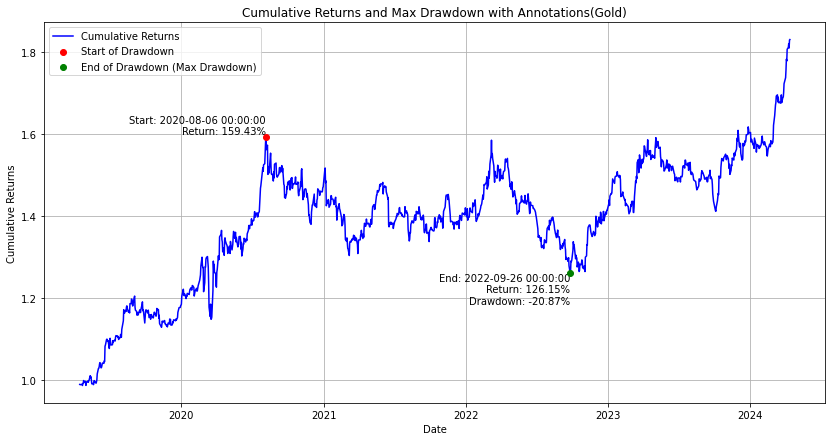

{'start_date': Timestamp('2020-08-06 00:00:00'),
 'end_date': Timestamp('2022-09-26 00:00:00'),
 'max_drawdown': -0.20872529913325646}

In [8]:
def calculate_max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    running_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - running_max) / running_max
    min_drawdown = drawdown.min()
    end_date = drawdown.idxmin()  
    start_date = (cumulative_returns[:end_date][cumulative_returns[:end_date] == running_max[:end_date]].idxmax())  # The date at which the last peak was
    return min_drawdown, start_date, end_date


# Function to plot cumulative returns and maximum drawdown for Gold_data
def plot_cumulative_returns_and_drawdown_with_annotations(returns, title='Cumulative Returns and Max Drawdown'):
    cum_returns = (1 + returns).cumprod()
    max_drawdown, start_dd, end_dd = calculate_max_drawdown(returns)
    plt.figure(figsize=(14, 7))
    plt.plot(cum_returns, label='Cumulative Returns', color='blue')
   
    plt.scatter(start_dd, cum_returns[start_dd], color='red', label='Start of Drawdown', zorder=5)
    plt.text(start_dd, cum_returns[start_dd], f'Start: {start_dd}\nReturn: {cum_returns[start_dd]*100:.2f}%', 
             horizontalalignment='right', verticalalignment='bottom')
   
    plt.scatter(end_dd, cum_returns[end_dd], color='green', label='End of Drawdown (Max Drawdown)', zorder=5)
    plt.text(end_dd, cum_returns[end_dd], f'End: {end_dd}\nReturn: {cum_returns[end_dd]*100:.2f}%\nDrawdown: {max_drawdown*100:.2f}%', 
             horizontalalignment='right', verticalalignment='top')

  
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.grid(True)
    plt.legend()
    plt.show()

  
    return {
        'start_date': start_dd,
        'end_date': end_dd,
        'max_drawdown': max_drawdown
    }

drawdown_Gold = plot_cumulative_returns_and_drawdown_with_annotations(gold_data['Daily Returns'], title='Cumulative Returns and Max Drawdown with Annotations(Gold)')
drawdown_Gold

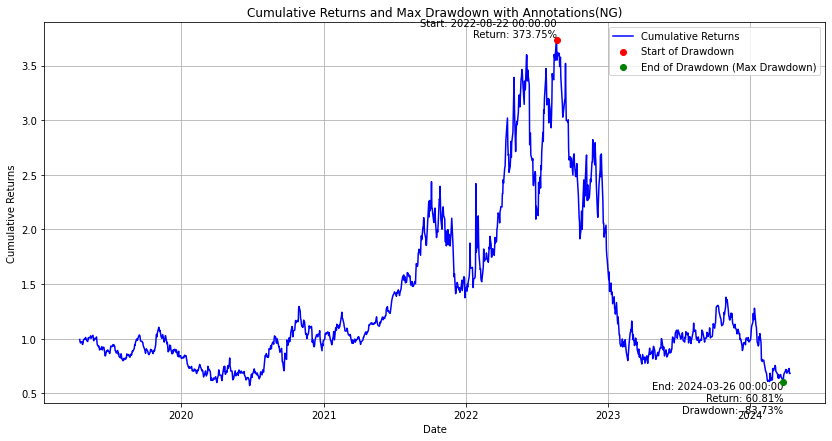

{'start_date': Timestamp('2022-08-22 00:00:00'),
 'end_date': Timestamp('2024-03-26 00:00:00'),
 'max_drawdown': -0.8372933886333056}

In [9]:
# Plot cumulative returns and maximum drawdown for Natural Gas data
drawdown_NG = plot_cumulative_returns_and_drawdown_with_annotations(natural_gas_data['Daily Returns'], title='Cumulative Returns and Max Drawdown with Annotations(NG)')
drawdown_NG

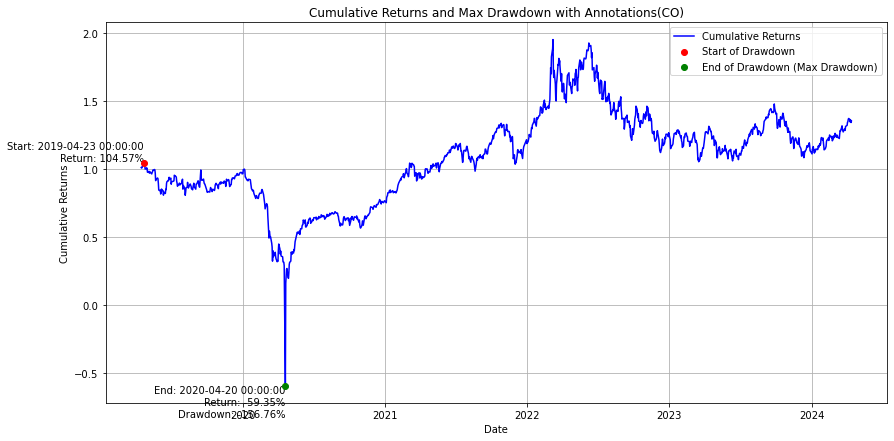

{'start_date': Timestamp('2019-04-23 00:00:00'),
 'end_date': Timestamp('2020-04-20 00:00:00'),
 'max_drawdown': -1.567571634027512}

In [10]:
#Plot cumulative returns and maximum drawdown for Crude Oil data
drawdown_CO = plot_cumulative_returns_and_drawdown_with_annotations(crude_oil_data['Daily Returns'], title='Cumulative Returns and Max Drawdown with Annotations(CO)')
drawdown_CO

# RISK MANAGEMENT

In [11]:
def annualized_return(data):
    daily_return = data['Adj Close'].pct_change()
    total_return = (data['Adj Close'].iloc[-1] / data['Adj Close'].iloc[0]) - 1
    annual_return = (1 + total_return) ** (252 / len(data)) - 1
    return annual_return


gold_annual_return = annualized_return(gold_data)
natural_gas_annual_return = annualized_return(natural_gas_data)
crude_oil_annual_return = annualized_return(crude_oil_data)

max_return = max(gold_annual_return, natural_gas_annual_return, crude_oil_annual_return)
if max_return == gold_annual_return:
    optimal_weights = {'gold': 1.0, 'natural_gas': 0.0, 'crude_oil': 0.0}
elif max_return == natural_gas_annual_return:
    optimal_weights = {'gold': 0.0, 'natural_gas': 1.0, 'crude_oil': 0.0}
else:
    optimal_weights = {'gold': 0.0, 'natural_gas': 0.0, 'crude_oil': 1.0}

print("Optimal weights:", optimal_weights)
print("Maximum possible annual return:", max_return)


portfolio_returns = (
    gold_data['Strategy Return'].fillna(0) * optimal_weights['gold'] +
    natural_gas_data['Strategy Return'].fillna(0) * optimal_weights['natural_gas'] +
    crude_oil_data['Strategy Return'].fillna(0) * optimal_weights['crude_oil']
)
portfolio_value = (1 + portfolio_returns).cumprod() * 100000
annualized_portfolio_return = (portfolio_value.iloc[-1] / portfolio_value.iloc[0] - 1) * (252 / len(portfolio_value))

print("Annualized return of the portfolio with optimal weights:", annualized_portfolio_return)

Optimal weights: {'gold': 1.0, 'natural_gas': 0.0, 'crude_oil': 0.0}
Maximum possible annual return: 0.12870889213091607
Annualized return of the portfolio with optimal weights: 0.0195520143249658


In [12]:
import scipy.optimize as sco

def portfolio_stats(weights, mean_returns, cov_matrix, risk_free_rate=0.10):
    returns = np.sum(mean_returns * weights) * 252
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    sharpe_ratio = (returns - risk_free_rate) / volatility
    return np.array([returns, volatility, sharpe_ratio])

def minimize_volatility(weights, mean_returns, cov_matrix):
    return portfolio_stats(weights, mean_returns, cov_matrix)[1]  

mean_returns = np.array([
    gold_data['Strategy Return'].mean(),
    natural_gas_data['Strategy Return'].mean(),
    crude_oil_data['Strategy Return'].mean()
])
cov_matrix = np.cov([
    gold_data['Strategy Return'].dropna(),
    natural_gas_data['Strategy Return'].dropna(),
    crude_oil_data['Strategy Return'].dropna()
])

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, 
               {'type': 'ineq', 'fun': lambda x: 0.10 - portfolio_stats(x, mean_returns, cov_matrix)[1]})   
bounds = ((0, 1), (0, 1), (0, 1))
initial_weights = np.array([1/3, 1/3, 1/3])

optimal_weights = sco.minimize(minimize_volatility, initial_weights, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)

print("Optimized Weights:", optimal_weights.x)
print("Expected Volatility:", portfolio_stats(optimal_weights.x, mean_returns, cov_matrix)[1])


Optimized Weights: [0.94070155 0.05002793 0.00927053]
Expected Volatility: 0.15079725596382887


In [13]:
import numpy as np
import scipy.optimize as sco


returns_data = np.array([
    gold_data['Strategy Return'].fillna(0),
    natural_gas_data['Strategy Return'].fillna(0),
    crude_oil_data['Strategy Return'].fillna(0)
])

mean_returns = returns_data.mean(axis=1) 
cov_matrix = np.cov(returns_data) 

# Measure the performance of portfolio
def portfolio_performance(weights, returns, cov_matrix, risk_free_rate=0.05):
    portfolio_return = np.dot(weights, returns) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio

# Minimize volatility
def minimize_volatility(weights, returns, cov_matrix):
    return portfolio_performance(weights, returns, cov_matrix)[1]

# Define constraints and bounds
constraints = [
    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Weights sum to 1
    {'type': 'ineq', 'fun': lambda x: 0.05 - portfolio_performance(x, mean_returns, cov_matrix)[1]}  # Volatility < 5%
]
bounds = ((0, 1), (0, 1), (0, 1))
initial_weights = np.array([1/3, 1/3, 1/3])

# Optimization
optimal_weights = sco.minimize(minimize_volatility, initial_weights, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)

# Output
if optimal_weights.success:
    optimized_weights = optimal_weights.x
    expected_volatility = portfolio_performance(optimized_weights, mean_returns, cov_matrix)[1]
    print("Optimized Weights:", optimized_weights)
    print("Expected Volatility:", expected_volatility)
else:
    print("Optimization failed:", optimal_weights.message)
optimal_weights = sco.minimize(
    minimize_volatility,
    initial_weights,
    args=(mean_returns, cov_matrix),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints,
    options={'maxiter': 50000000, 'ftol': 1e-09, 'disp': True}  # Display progress and increase tolerance
)


Optimization failed: Positive directional derivative for linesearch
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 0.15073733571742334
            Iterations: 15
            Function evaluations: 50
            Gradient evaluations: 11


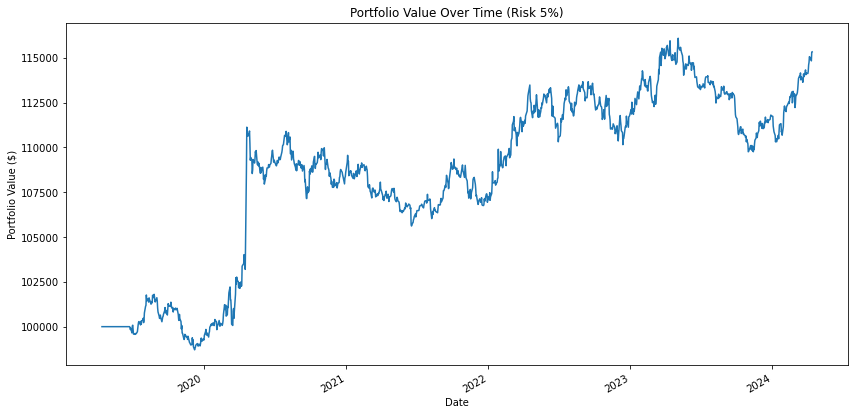

Risk Level: 5%
Cumulative Return: 15331.90
Annualized Volatility: 4.88%
Sharpe Ratio: 0.61



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_data(file_path):
    df = pd.read_csv(file_path)
    if 'Date' not in df.columns:
        raise KeyError("The 'Date' column is missing from the data.")
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['SMA50'] = df['Adj Close'].rolling(window=50).mean()
    df['EMA200'] = df['Adj Close'].ewm(span=200, adjust=False).mean()
    df['Signal'] = np.where(df['SMA50'] > df['EMA200'], 1, np.where(df['SMA50'] < df['EMA200'], -1, 0))
    df['Daily Return'] = df['Adj Close'].pct_change()
    df['Strategy Return'] = df['Daily Return'] * df['Signal'].shift(1)
    return df

def calculate_risk_adjusted_weights(vols, target_risk):
    total_vol = np.sqrt(sum(v**2 for v in vols.values()))
    return {k: (target_risk / total_vol) / v for k, v in vols.items()}

    
   

# Load and process data
file_paths = {
    'gold': 'gold_data.csv',
    'natural_gas': 'natural_gas_data.csv',
    'crude_oil': 'crude_oil_data.csv'
}
data = {commodity: process_data(path) for commodity, path in file_paths.items()}

# Calculate volatilities and adjust weights for risk levels
vols = {commodity: df['Daily Return'].std() * np.sqrt(252) for commodity, df in data.items()}
risk_levels = [0.05]
weights = {risk: calculate_risk_adjusted_weights(vols, risk) for risk in risk_levels}


# Calculate portfolio returns for each risk level
portfolio_returns = {}
for risk, ws in weights.items():
    combined_returns = sum(data[commodity]['Strategy Return'].fillna(0) * ws[commodity] for commodity in data.keys())
    portfolio_value = (1 + combined_returns).cumprod() * 100000
    volatility = combined_returns.std() * np.sqrt(252)
    sharpe_ratio = combined_returns.mean() / combined_returns.std() * np.sqrt(252)
    portfolio_returns[risk] = (portfolio_value, volatility, sharpe_ratio)

# Plot and print results for each risk level
for risk, (value, vol, sharpe) in portfolio_returns.items():
    value.plot(title=f'Portfolio Value Over Time (Risk {risk*100:.0f}%)', figsize=(14, 7))
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')
    plt.show()
    print(f"Risk Level: {risk*100:.0f}%")
    print(f"Cumulative Return: {value.iloc[-1] - 100000:.2f}")
    print(f"Annualized Volatility: {vol:.2%}")
    print(f"Sharpe Ratio: {sharpe:.2f}\n")


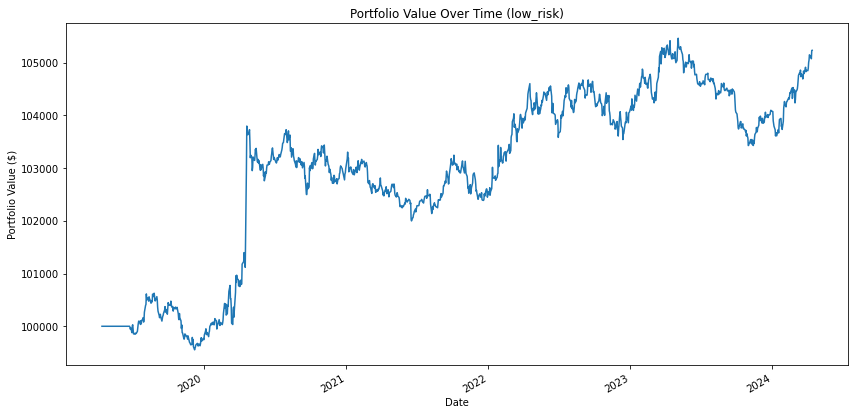

Low_risk Risk Level:
Cumulative Return: 5236.00
Annualized Volatility: 1.70%
Sharpe Ratio: 0.61



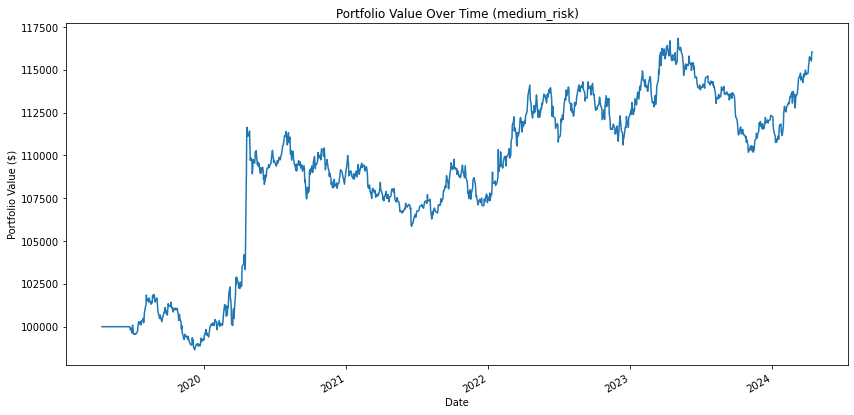

Medium_risk Risk Level:
Cumulative Return: 16045.77
Annualized Volatility: 5.10%
Sharpe Ratio: 0.61



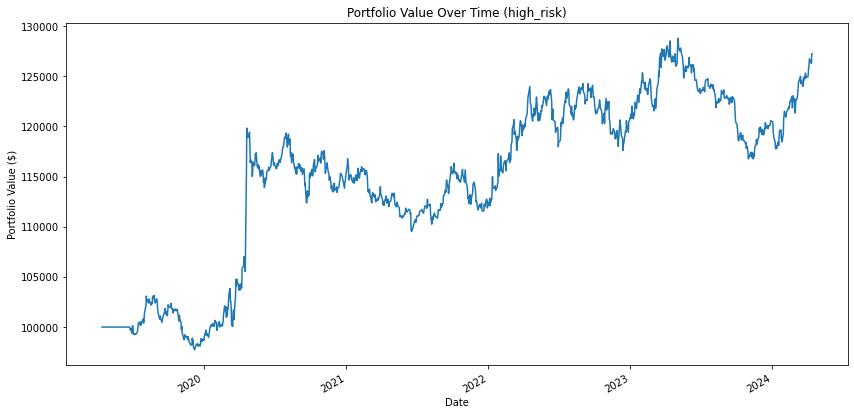

High_risk Risk Level:
Cumulative Return: 27245.95
Annualized Volatility: 8.51%
Sharpe Ratio: 0.61



In [15]:
# Measure the portfolio performance in different risk levels

def process_data(file_path):
    df = pd.read_csv(file_path)
    if 'Date' not in df.columns:
        raise KeyError("The 'Date' column is missing from the data.")
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['SMA50'] = df['Adj Close'].rolling(window=50).mean()
    df['EMA200'] = df['Adj Close'].ewm(span=200, adjust=False).mean()
    df['Signal'] = np.where(df['SMA50'] > df['EMA200'], 1, np.where(df['SMA50'] < df['EMA200'], -1, 0))
    df['Daily Return'] = df['Adj Close'].pct_change()
    df['Strategy Return'] = df['Daily Return'] * df['Signal'].shift(1)
    return df

def calculate_adjusted_weights(df, target_vol):
    annual_volatility = df['Daily Return'].std() * np.sqrt(252)
    weight = target_vol / annual_volatility
    return weight


# Define risk targets
risk_levels = {'low_risk': 0.01, 'medium_risk': 0.03, 'high_risk': 0.05}


weights = {
    level: {
        'gold': calculate_adjusted_weights(gold_data, risk),
        'natural_gas': calculate_adjusted_weights(natural_gas_data, risk),
        'crude_oil': calculate_adjusted_weights(crude_oil_data, risk)
    } for level, risk in risk_levels.items()
}

# Combine portfolio returns for each risk level
portfolio_returns = {}
for level, ws in weights.items():
    combined_returns = gold_data['Strategy Return'].fillna(0) * ws['gold'] + \
                       natural_gas_data['Strategy Return'].fillna(0) * ws['natural_gas'] + \
                       crude_oil_data['Strategy Return'].fillna(0) * ws['crude_oil']
    portfolio_returns[level] = combined_returns


for level, returns in portfolio_returns.items():
    portfolio_value = (1 + returns).cumprod() * 100000
    volatility = returns.std() * np.sqrt(252)
    sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)

    plt.figure()
    portfolio_value.plot(title=f'Portfolio Value Over Time ({level})', figsize=(14, 7))
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')
    plt.show()

    print(f"{level.capitalize()} Risk Level:")
    print(f"Cumulative Return: {portfolio_value.iloc[-1] - 100000:.2f}")
    print(f"Annualized Volatility: {volatility:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}\n")

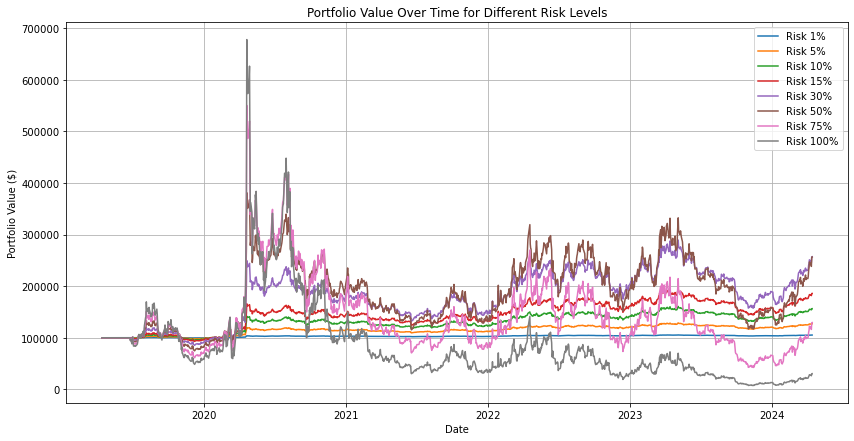

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_data(file_path):
    df = pd.read_csv(file_path)
    if 'Date' not in df.columns:
        raise KeyError("The 'Date' column is missing from the data.")
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df['SMA50'] = df['Adj Close'].rolling(window=50).mean()
    df['EMA200'] = df['Adj Close'].ewm(span=200, adjust=False).mean()
    df['Signal'] = np.where(df['SMA50'] > df['EMA200'], 1, np.where(df['SMA50'] < df['EMA200'], -1, 0))
    df['Daily Return'] = df['Adj Close'].pct_change()
    df['Strategy Return'] = df['Daily Return'] * df['Signal'].shift(1)
    return df

def calculate_adjusted_weights(df, target_vol):
    annual_volatility = df['Daily Return'].std() * np.sqrt(252)
    weight = target_vol / annual_volatility
    return weight



risk_levels = [0.01, 0.05, 0.1, 0.15, 0.3, 0.5, 0.75, 1.00]


portfolio_values = {}
for risk in risk_levels:
    weights = {
        commodity: calculate_adjusted_weights(df, risk) for commodity, df in data.items()
    }
    combined_returns = sum(df['Strategy Return'].fillna(0) * weights[commodity] for commodity, df in data.items())
    portfolio_value = (1 + combined_returns).cumprod() * 100000
    portfolio_values[risk] = portfolio_value


plt.figure(figsize=(14, 7))
for risk, value in portfolio_values.items():
    plt.plot(value, label=f'Risk {risk*100:.0f}%')

plt.title('Portfolio Value Over Time for Different Risk Levels')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()
